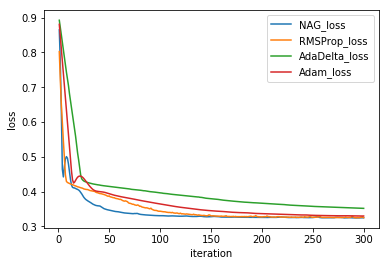

'\n'

In [2]:


from sklearn.datasets import load_svmlight_file
import math
import numpy as np
from numpy import random
import matplotlib.pyplot as plt

trainset_path = 'a9a.txt'
testset_path = 'a9at.txt'

X_train, y_train = load_svmlight_file(trainset_path)
X_test, y_test = load_svmlight_file(testset_path)

X_train = X_train.toarray()
X_train = np.column_stack((X_train, np.ones(len(y_train))))
X_test = X_test.toarray()
X_test = np.column_stack((X_test, np.zeros(len(y_test))))
X_test = np.column_stack((X_test, np.ones(len(y_test))))

"""
for i in range(0,len(y_train)):
	if(y_train[i]==-1):
		y_train[i]=0

for i in range(0,len(y_test)):
	if(y_test[i]==-1):
		y_test[i]=0
"""

def max(a, b):
	if(a>b):
		return a
	else:
		return b

def loss(X, y, sita, C=0.915):
	fx = 1-y*(X.dot(sita.T))
	ans = 0
	for i in fx:
		ans += max(i, 0)
	return (C*ans + (np.sum(sita**2)-sita[len(sita)-1]**2)/2)/len(y)

def gradient(X, y, sita, C=0.915):
	fx = 1-y*(X.dot(sita.T))
	y.shape = (y.shape[0],1)
	tmp = -X*y
	ans = np.zeros(X.shape[1])
	for i in range(0,len(y)):
		if(fx[i]>=0):
			ans+=tmp[i]

	ans = sita + C*ans
	ans[len(sita)-1]-=sita[len(sita)-1]
	return ans

def acc(X, y, sita):
	cnt = 0
	fx = X.dot(sita.T)
	for i in range(0, len(y)):
		if(fx[i]*y[i]>=0):
			cnt+=1
	return cnt/len(y)

def getSet(X, y, m):
	tX = np.zeros((m,X.shape[1]))
	ty = np.zeros(m)
	for i in range(0,m):
		k = random.randint(0,X.shape[0])
		tX[i] = X[k]
		ty[i] = y[k]
	return tX, ty

def NAG(X, y):

#	sita = random.rand(X.shape[1])
	sita = np.zeros(X.shape[1])
	v = np.zeros(X.shape[1])
	gamma = 0.90
	n = 0.0001
	m = 300
	t = []
	ans = []
	rate = []

	for i in range(0,300):
		
		tX, ty = getSet(X, y, m)

		g = gradient(tX, ty, sita - gamma*v)
		v = gamma*v + n*g
		sita = sita - v
		L=loss(X_test,y_test,sita)
#		print('NAG ',L)
		t.append(i+1)
		ans.append(L)
#		rate.append(acc(X_test, y_test, sita))

	plt.plot(t,ans,label='NAG_loss')
#	plt.plot(t,rate,label='NAG_acc')
	plt.xlabel('iteration')
	plt.ylabel('loss')
#	plt.show()	



def RMSProp(X, y):

	sita = np.zeros(X.shape[1])
	G = 0
	gamma = 0.9
	n = 0.005
	eps = 1e-8
	m = 300

	t = []
	ans = []
	rate = []

	for i in range(0,300):

		tX, ty = getSet(X, y, m)

		g = gradient(tX, ty, sita)
		G = gamma*G + (1-gamma)*(g*g)
		sita = sita - n/np.sqrt(G+eps)*g;
		L = loss(X_test, y_test, sita)
#		print('RMSProp ',L)
		t.append(i+1)
		ans.append(L)
#		rate.append(acc(X_test, y_test, sita))
	
	plt.plot(t,ans,label='RMSProp_loss')
#	plt.plot(t,rate,label='RMSProp_acc')
#	plt.show()


def AdaDelta(X, y):
	sita = np.zeros(X.shape[1])
	gamma = 0.999
	delta = 0
	G = 0
	m = 300
	eps = 1e-8

	t = []
	ans = []
	rate = []

	for i in range(0,300):

		tX, ty = getSet(X, y, m)

		g = gradient(tX, ty, sita)
		G = gamma*G + (1-gamma)*(g*g)
		tmp = -np.sqrt(delta+eps)/np.sqrt(G+eps)*g
		sita = sita + tmp
		delta = gamma*delta + (1-gamma)*tmp*tmp
		
		L = loss(X_test, y_test, sita)
#		print('AdaDelta ',L)
		t.append(i+1)
		ans.append(L)
#		rate.append(acc(X_test, y_test, sita))

	plt.plot(t,ans,label='AdaDelta_loss')
#	plt.plot(t,rate,label='AdaDelta_acc')
#	plt.show()


def Adam(X, y):
	sita = np.zeros(X.shape[1])
	beta = 0.9
	gamma = 0.999
	n = 0.005
	G = 0
	Mt = 0
	eps = 1e-8
	m = 300

	t = []
	ans = []
	rate = []

	for i in range(0,300):

		tX, ty = getSet(X, y, m)

		g = gradient(tX, ty, sita)
		Mt = beta*Mt + (1-beta)*g
		G = gamma*G + (1-gamma)*(g*g)
		tmp = n*np.sqrt(1-gamma**(i+1))/(1-beta**(i+1))
		sita = sita - tmp*Mt/np.sqrt(G+eps)
		
		L = loss(X_test, y_test, sita)
#		print('Adam ',L)
		t.append(i+1)
		ans.append(L)
#		rate.append(acc(X_test, y_test, sita))

	plt.plot(t,ans,label='Adam_loss')
#	plt.plot(t,rate,label='Adam_acc')
	plt.legend(loc = 'upper right')
	plt.show()



NAG(X_train, y_train)
RMSProp(X_train, y_train)
AdaDelta(X_train, y_train)
Adam(X_train, y_train)
"""
"""

